* Jupyter notebook of examples can be found in Binder: http://mybinder.org/repo/bastula/dicom-notebooks
* Code on https://github.com/dicompyler/dicompyler-core

* ipywidgets https://ipywidgets.readthedocs.io/en/latest/

##### RT Dose Methods
* dicomparser.py https://github.com/dicompyler/dicompyler-core/blob/master/dicompylercore/dicomparser.py

* GetStructures() = Returns a dictionary of structures (ROIs)
* GetDVHs()  = Returns cumulative dose-volume histograms (DVHs)
* GetDoseGrid = Return the 2d dose grid for the given slice position (mm)

##### DVH properties
* dvh.py https://github.com/dicompyler/dicompyler-core/blob/master/dicompylercore/dvh.py

* absolute_dose() = Return an absolute dose DVH
* relative_dose() = Return a relative dose DVH based on a prescription dose, rx_dose
* absolute_volume() = Return an absolute volume DVH.
* describe() =  a summary of DVH statistics in a text based format. Only shows volume statistics if a rx_dose has been defined
* compare() = Compare the DVH properties with another DVH
* volume_constraint() = Calculate the volume that receives at least a specific dose, i.e. V100, V150 or V20Gy
* dose_constraint() = Calculate the maximum dose that a specific volume receives, .i.e. D90, D100 or D2cc
* statistic() = Return a DVH dose or volume statistic, in the form of D90, D100, D2cc, V100 or V20Gy, etc.
* class DVHValue(object): Class that stores DVH values with the appropriate units
* relative_volume() = Return a relative volume DVH
* absolute_volume() = Return a absolute volume DVH

##### Calculate dose volume histogram (DVH) from DICOM RT Structure/Dose data
* dvhcalc.py https://github.com/dicompyler/dicompyler-core/blob/master/dicompylercore/dvhcalc.py

* get_dvh() = Calculate a cumulative DVH in Gy from a DICOM RT Structure Set & Dose
* calculate_dvh() = Calculate the differential DVH for the given structure and dose grid
* calculate_plane_histogram() = Calculate the DVH for the given plane in the structure
* get_contour_mask() = Get the mask for the contour with respect to the dose plane
* calculate_contour_dvh() = Calculate the differential DVH for the given contour and dose plane

In [89]:
%matplotlib inline
import os
import numpy as np
import dicom as dicom
from dicompylercore import dicomparser, dvh, dvhcalc
import matplotlib.pyplot as plt
import urllib.request
import os.path
from ipywidgets import FloatSlider, interactive
from scipy.misc import imresize

path = os.getcwd()
print(path)
os.listdir(path)

C:\Users\RCole02.ROYALSURREY\Desktop\GitHub\Useful-python-for-medical-physics\Experiments in ipython notebooks\dicompyler-core experiments\AXB project\Lung plan 30 exported 11-10-2016


['.ipynb_checkpoints',
 'Case_30 explore 11-10-2016.ipynb',
 'Case_30_AAA_Doses.dcm',
 'Case_30_AAA_Structures.dcm',
 'Case_30_Dm_Doses.dcm']

# Import structures

In [4]:
files = ['Case_30_AAA_Structures.dcm',  'Case_30_AAA_Doses.dcm', 'Case_30_Dm_Doses.dcm']

In [5]:
Structures_set = dicomparser.DicomParser(files[0])
AAA = dicomparser.DicomParser(files[1])
Dm = dicomparser.DicomParser(files[2])

Print the structures. Will want to parse these into allowed structure names later

In [7]:
key = 5   #  Keys start from 1
structures = Structures_set.GetStructures()  # returns a dict of structures
structures[key]

{'color': array([255,   0,   0]),
 'empty': False,
 'id': 5,
 'name': 'PTV CHEST_P27',
 'type': 'PTV'}

In [8]:
for i, structure in enumerate(structures):
    print(str(i+1) +  '   ' + structures[structure]['name'])

1   BODY_P27
2   Both Lungs_P9
3   ITV_P19
4   Heart_P
5   PTV CHEST_P27
6   Foramen_P
7   Oesophagus_P27
8   Foramen+3mm_P26
9   Skin-PTV+2cm_P13
10   Inner Ring_P3
11   Ribs-PTV_P6
12   Pseudo ITV_P10
13   R Brachial ple18
14   Ribs_P16
15   PseudoPTV-ITV_19
16   Skin_P19
17   Both Lungs-ITV20
18   Bronchial tree19
19   Rt_Lung_P19
20   PTV ring 2-3cm19
21   Lt_Lung_P18
22   Airway avoidan19
23   Trachea_P19
24   L Brachial ple19
25   CouchSurface_P24
26   CouchInterior_24
27   Dose 100[%]_P15
28   Dose 50[%]_P16
29   Dose 55[Gy]_P
30   Dose 27.5[Gy]_P


In [9]:
key = 4
heart = AAA.GetDVHs()[key]   # returns a DVH object
heart.name = structures[key]['name']  # assign the structure name
heart.describe()

Structure: Heart_P
-----
DVH Type:  cumulative, abs dose: Gy, abs volume: cm3
Volume:    551.11 cm3
Max Dose:  2.83 Gy
Min Dose:  0.04 Gy
Mean Dose: 0.34 Gy
D100:      0.00 Gy
D98:       0.05 Gy
D95:       0.05 Gy
D2cc:      1.97 Gy


In [10]:
heart.describe()

Structure: Heart_P
-----
DVH Type:  cumulative, abs dose: Gy, abs volume: cm3
Volume:    551.11 cm3
Max Dose:  2.83 Gy
Min Dose:  0.04 Gy
Mean Dose: 0.34 Gy
D100:      0.00 Gy
D98:       0.05 Gy
D95:       0.05 Gy
D2cc:      1.97 Gy


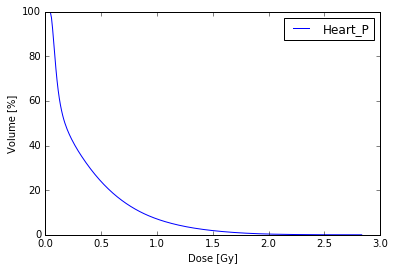

In [12]:
heart.relative_volume.plot();

### Set the Rx dose to show volume statistics and relative dose:

In [13]:
heart.rx_dose = 14
heart.relative_dose().describe()

Structure: Heart_P
-----
DVH Type:  cumulative, rel dose, abs volume: cm3
Volume:    551.11 cm3
Max Dose:  20.21 %
Min Dose:  0.29 %
Mean Dose: 2.44 %
D100:      0.00 %
D98:       0.36 %
D95:       0.36 %
V100:      0.00 cm3
V95:       0.00 cm3
V5:        81.09 cm3
D2cc:      14.07 %


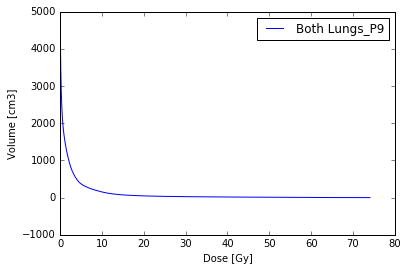

In [14]:
key = 2
lung = AAA.GetDVHs()[key]
lung.name = structures[key]['name']
lung.rx_dose = 55
lung.plot();

In [15]:
lung.max

74.040000000000973

In [16]:
lung.relative_volume.V5Gy

dvh.DVHValue(7.942661114155448, '%')

In [17]:
lung.relative_dose().D2cc

dvh.DVHValue(114.5090909090837, '%')

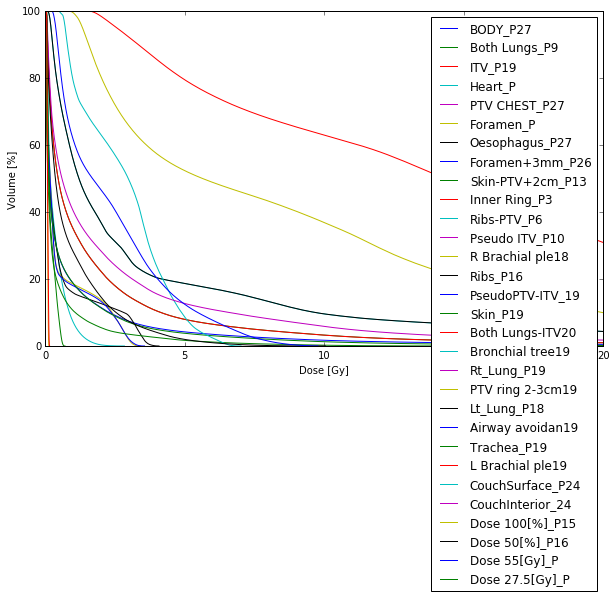

In [18]:
plt.figure(figsize=(10, 6))
plt.axis([0, 20, 0, 100])
for s in structures.values():
    if not s['empty']:
        dvh.DVH.from_dicom_dvh(AAA.ds, s['id'], name=s['name']).relative_volume.plot()

In [19]:
def compare_dvh(key=1):
    structure = Structures_set.GetStructures()[key]
    AAA_ = dvh.DVH.from_dicom_dvh(AAA.ds, key, name=structure['name'] + 'AAA')
    Dm_ = dvh.DVH.from_dicom_dvh(Dm.ds, key, name=structure['name'] + 'Dm')
    Dm_.name = structure['name'] + 'Dm'
    AAA_.compare(Dm_)

Structure:  PTV CHEST_P27AAA   PTV CHEST_P27Dm          Rel Diff       Abs diff
-----
DVH Type:  cumulative, abs dose: Gy, abs volume: cm3
Volume:             6.05 cm3          6.05 cm3         +0.00 %          +0.00
Max:               74.04 Gy          74.63 Gy          +0.80 %          +0.59
Min:               52.42 Gy          47.45 Gy          -9.48 %          -4.97
Mean:              61.60 Gy          59.06 Gy          -4.13 %          -2.55
D100:               0.00 Gy           0.00 Gy          +0.00 %          +0.00
D98:               55.48 Gy          50.44 Gy          -9.08 %          -5.04
D95:               56.17 Gy          51.62 Gy          -8.10 %          -4.55
D2cc:              62.97 Gy          60.89 Gy          -3.30 %          -2.08


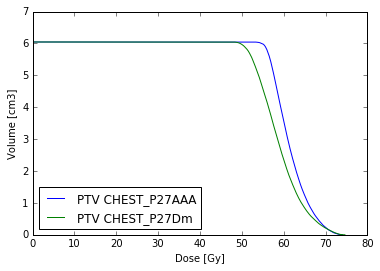

In [20]:
compare_dvh(key=5)

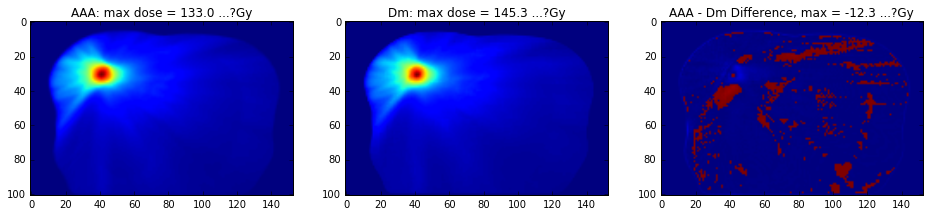

In [124]:
planes = \
    (np.array(AAA.ds.GridFrameOffsetVector) \
    * AAA.ds.ImageOrientationPatient[0]) \
    + AAA.ds.ImagePositionPatient[2]

AAA_dd = AAA.GetDoseData()
Dm_dd = Dm.GetDoseData()

y = FloatSlider(
    value=0.56,
    min=planes[0],
    max=planes[-1],
    step=np.diff(planes)[0],
    description='Slice Position (mm):',
)

def showdoseboth(z):
    # get numpy arrays for plot
    AAA_max = AAA.GetDoseGrid(z).max()/10000.0
    Dm_max = Dm.GetDoseGrid(z).max()/10000.0
    AAA_Dm_diff = AAA_max - Dm_max
    
    AAA_display = imresize(AAA.GetDoseGrid(z), Dm.GetDoseGrid(z).shape)  # make image grids identical and images    
    Dm_display =  imresize(Dm.GetDoseGrid(z), Dm.GetDoseGrid(z).shape)  # make image grids identical
    # need AAA_dd ['dosegridscaling']
    
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8))
    #ax1.imshow(AAA.GetDoseGrid(z) * AAA_dd ['dosegridscaling'], vmin=0,vmax=AAA_dd ['dosemax'] * AAA_dd ['dosegridscaling'])
    
    ax1.imshow(AAA_display)
    ax1.set_title('AAA: max dose = ' + str('%.1f' % round(AAA_max, 3)) + ' ...?Gy')
    
    #ax2.imshow(Dm.GetDoseGrid(z) * Dm_dd['dosegridscaling'], vmin=0,vmax=Dm_dd['dosemax'] * Dm_dd['dosegridscaling'])
    ax2.imshow(Dm_display)
    
    ax2.set_title('Dm: max dose = ' + str('%.1f' % round(Dm_max, 3) + ' ...?Gy'))
    
    #x2.imshow(np.subtract(AAA.GetDoseGrid(z) - Dm.GetDoseGrid(z)) * dd['dosegridscaling'], vmin=0,vmax=dd['dosemax'] * dd['dosegridscaling'])
    
    difference_display = np.absolute(np.subtract(AAA_display, Dm_display))
    ax3.imshow(difference_display ) # , vmin=0,vmax=difference_display.max()
    ax3.set_title('AAA - Dm Difference, max = ' + str('%.1f' % round(AAA_Dm_diff, 3) + ' ...?Gy'))
    plt.show()

interactive(showdoseboth, z=y)

In [104]:
AAA_display = imresize(AAA.GetDoseGrid(z), Dm.GetDoseGrid(z).shape)  # make image grids identical
Dm_display =  Dm.GetDoseGrid(z)  # make image grids identical
difference_display = np.subtract(AAA_display, Dm_display)

difference_display.mean()

2545071970.0408335

Cant do difference plot as array sizes are different

In [43]:
AAA_dose_grid = AAA.GetDoseGrid(50)*AAA.GetDoseData()['dosegridscaling']
Dm_dose_grid = Dm.GetDoseGrid(50)*Dm.GetDoseData()['dosegridscaling']

In [57]:
print(AAA.GetDoseGrid(50).shape)
print(AAA.GetDoseData()['dosegridscaling'])

(100, 152)
5.5e-5


In [59]:
print(Dm.GetDoseGrid(50).shape)
print(Dm.GetDoseData()['dosegridscaling'])

(101, 153)
5.0691244e-5


In [88]:
z = 50
print( 'AAA.GetDoseGrid ' + str(AAA.GetDoseGrid(z).shape))
print( 'Dm.GetDoseGrid ' + str(Dm.GetDoseGrid(z).shape))

AAA_resize = imresize(AAA.GetDoseGrid(z), Dm.GetDoseGrid(z).shape)  # make image grids identical
AAA_resize.shape

AAA.GetDoseGrid (100, 152)
Dm.GetDoseGrid (101, 153)


(101, 153)

In [90]:
?AAA.GetDoseGrid(z)

In [95]:
AAA_resize.min()

0

# Unused

In [75]:
planes = \
    (np.array(AAA.ds.GridFrameOffsetVector) \
    * AAA.ds.ImageOrientationPatient[0]) \
    + AAA.ds.ImagePositionPatient[2]
dd = AAA.GetDoseData()


w = FloatSlider(
    value=0.56,
    min=planes[0],
    max=planes[-1],
    step=np.diff(planes)[0],
    description='Slice Position (mm):',
)

def showdose(z):
    plt.imshow(AAA.GetDoseGrid(z) * dd['dosegridscaling'],
               vmin=0,
               vmax=dd['dosemax'] * dd['dosegridscaling'])

#interactive(showdose, z=w)